# **Perancangan Model Klasifikasi Tingkat Fokus Pada Data EEG Menggunakan CNN**

Disini dilakukan perancangan model klasifikasi CNN mulai dari pengolahan dataset spektogram ke ukuran 128x128 dan pemisahan data hingga pelatihan model CNN.

Struktur folder dan file dataset adalah sebagai berikut
```bash
spectrogram
|-- relaxed
|   |-- spectrogram_x.png
|   |-- ...
|-- concentrating
|   |-- spectrogram_x.png
|   |-- ...
|-- neutral
|   |-- spectrogram_x.png
|   |-- ...
```

Found 1944 images belonging to 3 classes.
Found 486 images belonging to 3 classes.
Epoch 1/10
60/60 [==============================] - 101s 2s/step - loss: 0.9316 - accuracy: 0.5115 - val_loss: 0.6891 - val_accuracy: 0.6167
Epoch 2/10
60/60 [==============================] - 89s 1s/step - loss: 0.6397 - accuracy: 0.6825 - val_loss: 0.6277 - val_accuracy: 0.7083
Epoch 3/10
60/60 [==============================] - 96s 2s/step - loss: 0.5716 - accuracy: 0.7453 - val_loss: 0.5852 - val_accuracy: 0.7437
Epoch 4/10
60/60 [==============================] - 95s 2s/step - loss: 0.5321 - accuracy: 0.7903 - val_loss: 0.4749 - val_accuracy: 0.8167
Epoch 5/10
60/60 [==============================] - 89s 1s/step - loss: 0.4578 - accuracy: 0.8211 - val_loss: 0.4419 - val_accuracy: 0.8396
Epoch 6/10
60/60 [==============================] - 94s 2s/step - loss: 0.4332 - accuracy: 0.8237 - val_loss: 0.4303 - val_accuracy: 0.8521
Epoch 7/10
60/60 [==============================] - 94s 2s/step - loss: 0.41

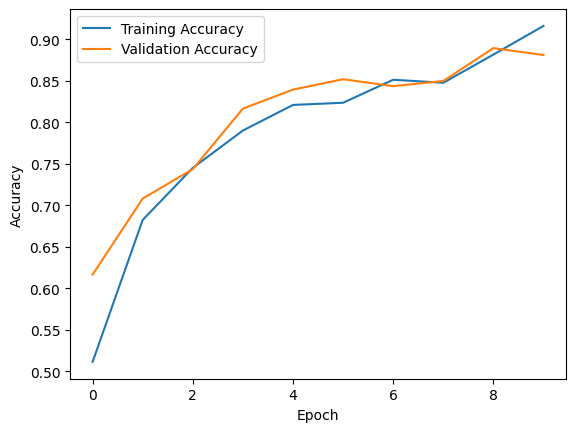

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set direktori dataset
data_dir = "/spectrograms/"

# Ukuran gambar dan batch_size pelatihan
img_size = (128, 128)
batch_size = 32

# Augmentasi data untuk keberagaman data
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Pemisahan data latih
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Pemisahan data latih
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Pembuatan Model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Pelatihan Model
trained_model = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluasi hasil latih dalam grafik
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Penyimpanan Model ke .h5**

In [ ]:
model.save('/Model/mental_state_classifier_cnn.h5')